<a href="https://colab.research.google.com/github/dataanalitik/Roman_Tevanyan/blob/main/Bachelor_diploma_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/lending_club_loans.csv')

In [ ]:
df.shape

(39786, 47)

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [ ]:
df = df.drop(columns=['id', 'member_id','funded_amnt', 'funded_amnt_inv','sub_grade','issue_d','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                      'out_prncp','out_prncp_inv','zip_code', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39786 non-null  int64  
 1   term                        39786 non-null  object 
 2   int_rate                    39786 non-null  object 
 3   installment                 39786 non-null  float64
 4   grade                       39786 non-null  object 
 5   emp_length                  38708 non-null  object 
 6   home_ownership              39786 non-null  object 
 7   annual_inc                  39786 non-null  float64
 8   verification_status         39786 non-null  object 
 9   loan_status                 39786 non-null  object 
 10  pymnt_plan                  39786 non-null  object 
 11  addr_state                  39786 non-null  object 
 12  dti                         39786 non-null  float64
 13  delinq_2yrs                 397

In [ ]:
df['loan_status'].value_counts()

Fully Paid            34108
Charged Off            5662
Late (31-120 days)       10
Current                   3
Late (16-30 days)         1
In Grace Period           1
Default                   1
Name: loan_status, dtype: int64

In [ ]:
mapping = {'Fully Paid':1,'Charged Off':0, 'Late (31-120 days)':0, 'Default':0}
df['loan_status']= df['loan_status'].map(mapping)
print(df['loan_status'].value_counts())

1.00000    34108
0.00000     5673
Name: loan_status, dtype: int64


In [ ]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '1078' ==> '2.709%'
'loan_status': number of missing values '5' ==> '0.013%'
'revol_util': number of missing values '50' ==> '0.126%'
'last_credit_pull_d': number of missing values '2' ==> '0.005%'
'collections_12_mths_ex_med': number of missing values '56' ==> '0.141%'
'chargeoff_within_12_mths': number of missing values '56' ==> '0.141%'
'pub_rec_bankruptcies': number of missing values '697' ==> '1.752%'
'tax_liens': number of missing values '39' ==> '0.098%'


In [ ]:
for column in df.columns:
  uniq= df[column].dropna().unique()
  if len(uniq)>=2:
    print(f'multiple unique values {column} {len(uniq)}')
  else:
    df=df.drop(columns=column)
    print(f'only one unique value {column} {uniq}')

multiple unique values loan_amnt 885
multiple unique values term 2
multiple unique values int_rate 371
multiple unique values installment 15405
multiple unique values grade 7
multiple unique values emp_length 11
multiple unique values home_ownership 5
multiple unique values annual_inc 5323
multiple unique values verification_status 3
multiple unique values loan_status 2
only one unique value pymnt_plan ['n']
multiple unique values addr_state 50
multiple unique values dti 2868
multiple unique values delinq_2yrs 11
multiple unique values earliest_cr_line 526
multiple unique values inq_last_6mths 9
multiple unique values open_acc 40
multiple unique values pub_rec 5
multiple unique values revol_bal 21738
multiple unique values revol_util 1089
multiple unique values total_acc 82
only one unique value initial_list_status ['f']
multiple unique values last_credit_pull_d 114
only one unique value collections_12_mths_ex_med [0.]
only one unique value application_type ['INDIVIDUAL']
only one uniq

In [ ]:
##DROPPING VALUES WITHOUT ANY TARGET VARIABLE INFORMATION
df = df.dropna(subset=['loan_status'])
print(df.isnull().sum()[df.isnull().sum()>0])

emp_length              1077
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0.00000    37399
1.00000     1678
2.00000        7
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df = df.dropna(subset=['emp_length','revol_util','last_credit_pull_d'])
df = df.drop(columns=['pub_rec_bankruptcies'], axis=1)
print(df.isnull().sum())

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64


In [ ]:
print(df.describe())

        loan_amnt  installment    annual_inc  loan_status         dti  \
count 38655.00000  38655.00000   38655.00000  38655.00000 38655.00000   
mean  11310.78838    327.13909   69643.71639      0.85960    13.33277   
std    7469.18762    209.20577   64220.23225      0.34740     6.66511   
min     500.00000     15.69000    4000.00000      0.00000     0.00000   
25%    5525.00000    168.49500   41502.20000      1.00000     8.21000   
50%   10000.00000    283.28000   60000.00000      1.00000    13.42000   
75%   15000.00000    435.04000   83200.00000      1.00000    18.60000   
max   35000.00000   1305.19000 6000000.00000      1.00000    29.99000   

       delinq_2yrs  inq_last_6mths    open_acc     pub_rec    revol_bal  \
count  38655.00000     38655.00000 38655.00000 38655.00000  38655.00000   
mean       0.14684         0.86995     9.32335     0.05347  13483.29833   
std        0.49226         1.06988     4.39343     0.23455  15927.54551   
min        0.00000         0.00000     2.0

In [ ]:
print(df.dtypes.value_counts())

object     10
int64       7
float64     4
dtype: int64


In [ ]:
df.select_dtypes(include=['float','int'])

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
0,5000,162.87000,24000.00000,1.00000,27.65000,0,1,3,0,13648,9
1,2500,59.83000,30000.00000,0.00000,1.00000,0,5,3,0,1687,4
2,2400,84.33000,12252.00000,1.00000,8.72000,0,2,2,0,2956,10
3,10000,339.31000,49200.00000,1.00000,20.00000,0,1,10,0,5598,37
4,3000,67.79000,80000.00000,1.00000,17.94000,0,0,15,0,27783,38
...,...,...,...,...,...,...,...,...,...,...,...
39781,2500,78.42000,110000.00000,1.00000,11.33000,0,0,13,0,7274,40
39782,8500,275.38000,18000.00000,1.00000,6.40000,1,1,6,0,8847,9
39783,5000,156.84000,100000.00000,1.00000,2.30000,0,0,11,0,9698,20
39784,5000,155.38000,200000.00000,1.00000,3.72000,0,0,17,0,85607,26


In [ ]:
df.select_dtypes(include=['object'])

,term,int_rate,grade,emp_length,home_ownership,verification_status,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,10.65%,B,10+ years,RENT,Verified,AZ,Jan-85,83.70%,Jan-17
1,60 months,15.27%,C,< 1 year,RENT,Source Verified,GA,Apr-99,9.40%,Oct-16
2,36 months,15.96%,C,10+ years,RENT,Not Verified,IL,Nov-01,98.50%,Jan-17
3,36 months,13.49%,C,10+ years,RENT,Source Verified,CA,Feb-96,21%,Apr-16
4,60 months,12.69%,B,1 year,RENT,Source Verified,OR,Jan-96,53.90%,Jan-17
...,...,...,...,...,...,...,...,...,...,...
39781,36 months,8.07%,A,4 years,MORTGAGE,Not Verified,CO,Nov-90,13.10%,Jun-10
39782,36 months,10.28%,C,3 years,RENT,Not Verified,NC,Dec-86,26.90%,Jul-10
39783,36 months,8.07%,A,< 1 year,MORTGAGE,Not Verified,MA,Oct-98,19.40%,Jun-07
39784,36 months,7.43%,A,< 1 year,MORTGAGE,Not Verified,MD,Nov-88,0.70%,Jun-07


In [ ]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for col in cols:
  print(df[col].value_counts())

RENT        18474
MORTGAGE    17242
OWN          2840
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16471
Verified           12377
Source Verified     9807
Name: verification_status, dtype: int64
10+ years    8896
< 1 year     4576
2 years      4389
3 years      4094
4 years      3437
5 years      3281
1 year       3241
6 years      2228
7 years      1772
8 years      1482
9 years      1259
Name: emp_length, dtype: int64
 36 months    28241
 60 months    10414
Name: term, dtype: int64
CA    6908
NY    3712
FL    2781
TX    2675
NJ    1824
IL    1487
PA    1481
VA    1378
GA    1358
MA    1313
OH    1190
MD    1034
AZ     833
WA     807
CO     770
NC     760
CT     734
MI     688
MO     662
MN     592
NV     482
SC     464
WI     445
OR     435
AL     433
LA     426
KY     323
OK     294
KS     260
UT     253
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
MT      79
WY      79
AK      79
SD      62
VT  

In [ ]:
mapping_dict = {
        "10+ years": "experienced",
        "9 years": "experienced",
        "8 years": "experienced",
        "7 years": "experienced",
        "6 years": "intermediate",
        "5 years": "intermediate",
        "4 years": "intermediate",
        "3 years": "beginner",
        "2 years": "beginner",
        "1 year": "beginner",
        "< 1 year": "beginner",
        "n/a": "beginner"
}

In [ ]:
df = df.drop(columns=["last_credit_pull_d", "earliest_cr_line", 'grade', "addr_state"], axis=1)

In [ ]:
df['emp_length']= df['emp_length'].map(mapping_dict)
df['int_rate']= df['int_rate'].str.rstrip('%').astype("float")
df['revol_util']= df['revol_util'].str.rstrip('%').astype("float")
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,36 months,10.65000,162.87000,experienced,RENT,24000.00000,Verified,1.00000,27.65000,0,1,3,0,13648,83.70000,9
1,2500,60 months,15.27000,59.83000,beginner,RENT,30000.00000,Source Verified,0.00000,1.00000,0,5,3,0,1687,9.40000,4
2,2400,36 months,15.96000,84.33000,experienced,RENT,12252.00000,Not Verified,1.00000,8.72000,0,2,2,0,2956,98.50000,10
3,10000,36 months,13.49000,339.31000,experienced,RENT,49200.00000,Source Verified,1.00000,20.00000,0,1,10,0,5598,21.00000,37
4,3000,60 months,12.69000,67.79000,beginner,RENT,80000.00000,Source Verified,1.00000,17.94000,0,0,15,0,27783,53.90000,38


In [ ]:
cat_cols= ["home_ownership", "verification_status", "term", 'emp_length']
dummy_df = pd.get_dummies(df[cat_cols])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(cat_cols, axis=1)
df

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months,emp_length_beginner,emp_length_experienced,emp_length_intermediate
0,5000,10.65000,162.87000,24000.00000,1.00000,27.65000,0,1,3,0,13648,83.70000,9,0,0,0,0,1,0,0,1,1,0,0,1,0
1,2500,15.27000,59.83000,30000.00000,0.00000,1.00000,0,5,3,0,1687,9.40000,4,0,0,0,0,1,0,1,0,0,1,1,0,0
2,2400,15.96000,84.33000,12252.00000,1.00000,8.72000,0,2,2,0,2956,98.50000,10,0,0,0,0,1,1,0,0,1,0,0,1,0
3,10000,13.49000,339.31000,49200.00000,1.00000,20.00000,0,1,10,0,5598,21.00000,37,0,0,0,0,1,0,1,0,1,0,0,1,0
4,3000,12.69000,67.79000,80000.00000,1.00000,17.94000,0,0,15,0,27783,53.90000,38,0,0,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500,8.07000,78.42000,110000.00000,1.00000,11.33000,0,0,13,0,7274,13.10000,40,1,0,0,0,0,1,0,0,1,0,0,0,1
39782,8500,10.28000,275.38000,18000.00000,1.00000,6.40000,1,1,6,0,8847,26.90000,9,0,0,0,0,1,1,0,0,1,0,1,0,0
39783,5000,8.07000,156.84000,100000.00000,1.00000,2.30000,0,0,11,0,9698,19.40000,20,1,0,0,0,0,1,0,0,1,0,1,0,0
39784,5000,7.43000,155.38000,200000.00000,1.00000,3.72000,0,0,17,0,85607,0.70000,26,1,0,0,0,0,1,0,0,1,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38655 entries, 0 to 39785
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38655 non-null  int64  
 1   int_rate                             38655 non-null  float64
 2   installment                          38655 non-null  float64
 3   annual_inc                           38655 non-null  float64
 4   loan_status                          38655 non-null  float64
 5   dti                                  38655 non-null  float64
 6   delinq_2yrs                          38655 non-null  int64  
 7   inq_last_6mths                       38655 non-null  int64  
 8   open_acc                             38655 non-null  int64  
 9   pub_rec                              38655 non-null  int64  
 10  revol_bal                            38655 non-null  int64  
 11  revol_util                  

In [ ]:
df[df.select_dtypes(include=['float','int']).columns].columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

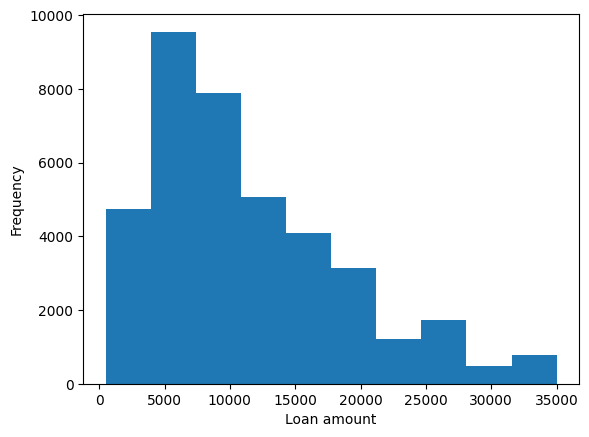

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['loan_amnt'])
plt.ylabel("Frequency")
plt.xlabel("Loan amount")
plt.show()

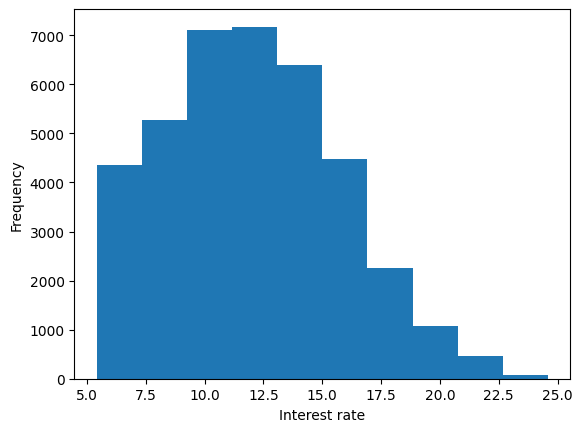

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['int_rate'])
plt.ylabel("Frequency")
plt.xlabel("Interest rate")
plt.show()

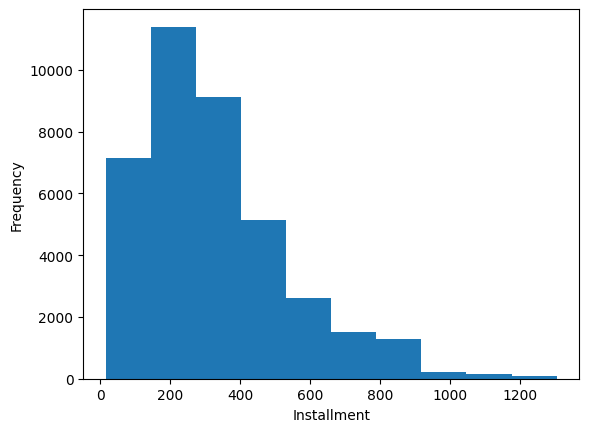

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['installment'])
plt.ylabel("Frequency")
plt.xlabel("Installment")
plt.show()

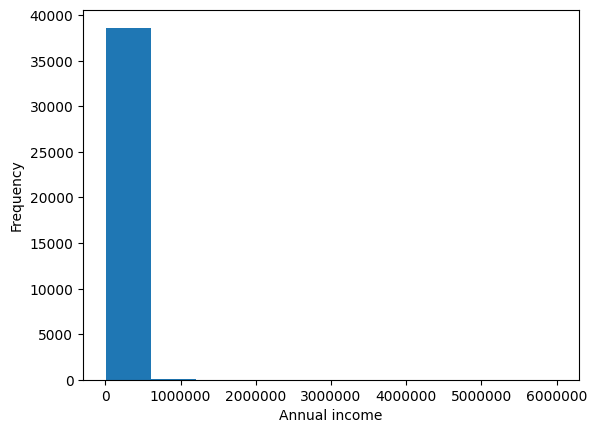

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['annual_inc'])
plt.ylabel("Frequency")
plt.xlabel("Annual income")
plt.show()

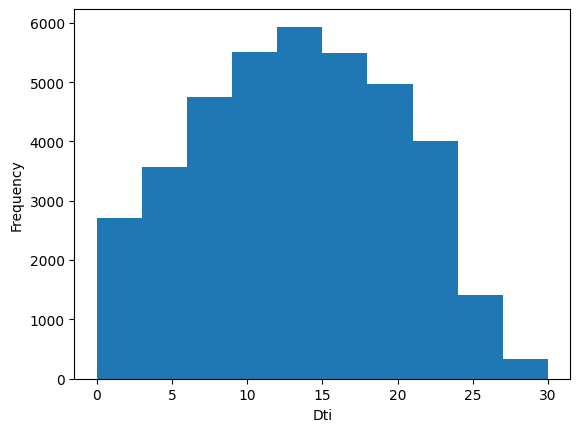

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['dti'])
plt.ylabel("Frequency")
plt.xlabel("Dti")
plt.show()

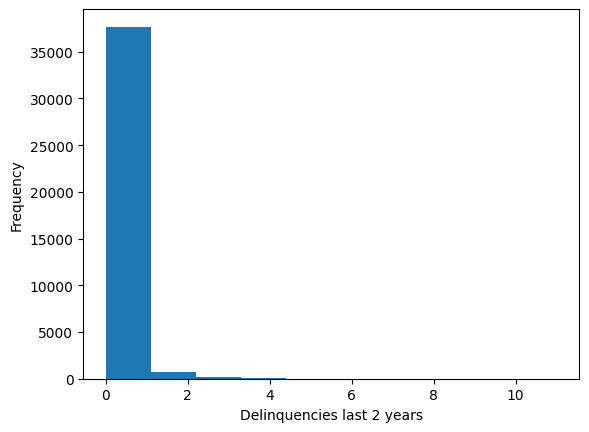

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['delinq_2yrs'])
plt.ylabel("Frequency")
plt.xlabel("Delinquencies last 2 years")
plt.show()

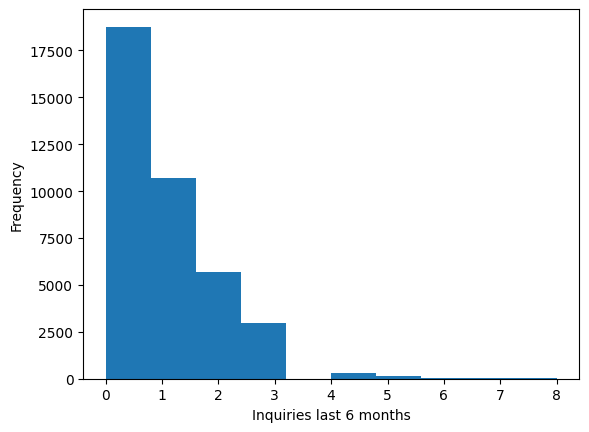

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['inq_last_6mths'])
plt.ylabel("Frequency")
plt.xlabel("Inquiries last 6 months")
plt.show()

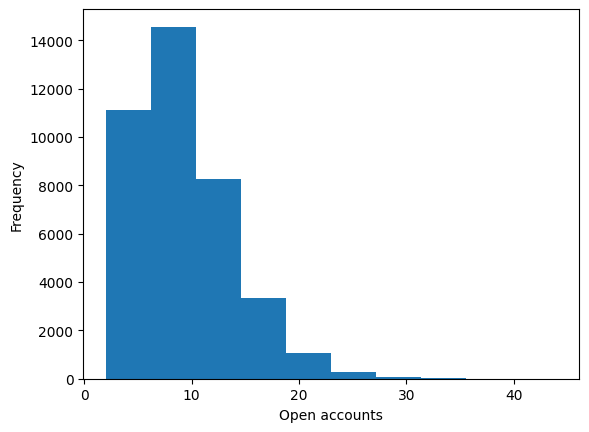

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['open_acc'])
plt.ylabel("Frequency")
plt.xlabel("Open accounts")
plt.show()

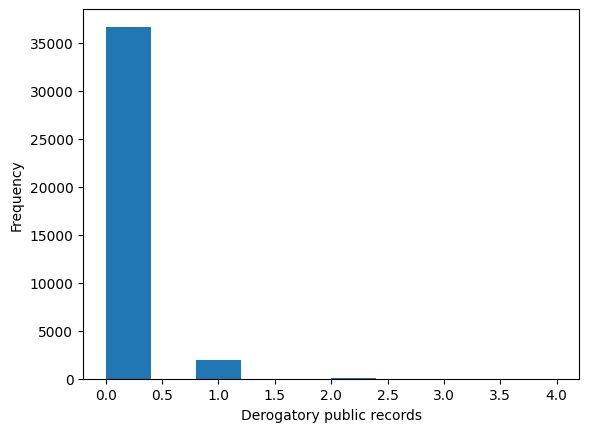

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['pub_rec'])
plt.ylabel("Frequency")
plt.xlabel("Derogatory public records")
plt.show()

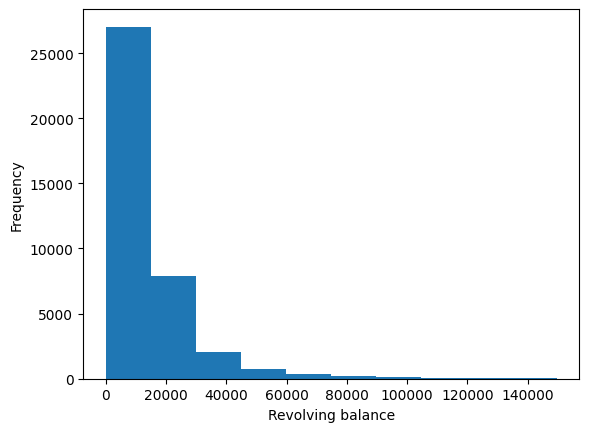

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['revol_bal'])
plt.ylabel("Frequency")
plt.xlabel("Revolving balance")
plt.show()

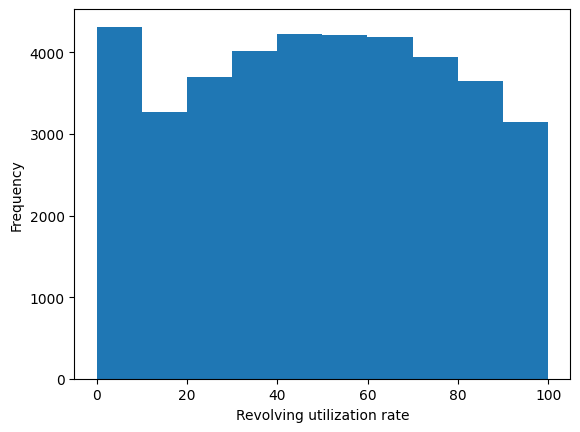

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['revol_util'])
plt.ylabel("Frequency")
plt.xlabel("Revolving utilization rate")
plt.show()

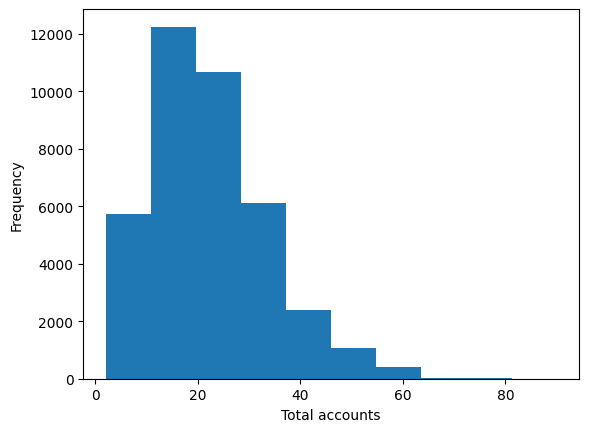

In [ ]:
plt.ticklabel_format(style = 'plain')
plt.hist(df['total_acc'])
plt.ylabel("Frequency")
plt.xlabel("Total accounts")
plt.show()

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months,emp_length_beginner,emp_length_experienced,emp_length_intermediate
count,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000,38655.00000
mean,11310.78838,12.05468,327.13909,69643.71639,0.85960,13.33277,0.14684,0.86995,9.32335,0.05347,13483.29833,49.02356,22.13799,0.44605,0.00008,0.00248,0.07347,0.47792,0.42610,0.25371,0.32019,0.73059,0.26941,0.42168,0.34689,0.23143
std,7469.18762,3.71864,209.20577,64220.23225,0.34740,6.66511,0.49226,1.06988,4.39343,0.23455,15927.54551,28.30951,11.38984,0.49709,0.00881,0.04977,0.26091,0.49952,0.49452,0.43514,0.46656,0.44366,0.44366,0.49383,0.47599,0.42175
min,500.00000,5.42000,15.69000,4000.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,5525.00000,9.32000,168.49500,41502.20000,1.00000,8.21000,0.00000,0.00000,6.00000,0.00000,3763.00000,25.70000,14.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,10000.00000,11.86000,283.28000,60000.00000,1.00000,13.42000,0.00000,1.00000,9.00000,0.00000,8963.00000,49.50000,20.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
75%,15000.00000,14.59000,435.04000,83200.00000,1.00000,18.60000,0.00000,1.00000,12.00000,0.00000,17176.00000,72.50000,29.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
max,35000.00000,24.59000,1305.19000,6000000.00000,1.00000,29.99000,11.00000,8.00000,44.00000,4.00000,149588.00000,99.90000,90.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [ ]:
df = df[(df['loan_amnt']<=29212.5)&(df['int_rate']<=22.5)&(df['installment']<=835)&(df['annual_inc']<=145750)&(df['inq_last_6mths']<=3)
&(df['open_acc']<=21)&(df['pub_rec']<=1)&(df['revol_bal']<=37295.5)&(df['total_acc']<=52)]

In [ ]:
df['loan_status'].value_counts()/df.shape[0]

1.00000   0.86167
0.00000   0.13833
Name: loan_status, dtype: float64

In [ ]:
df.shape

(32632, 26)

In [ ]:
def plot_model_performance(target, predictions):
    # Confusion Matrix
    cm = metrics.confusion_matrix(target, predictions)
    labels = pd.DataFrame(data=cm, index=['Actual_Negative','Actual_Positive'], columns=['Guessed_Negative', 'Guessed_Positive'])
    sns.heatmap(labels, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, color='#D2691E', label='AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:

features = df.drop(columns=['loan_status'],axis=1)
target = df['loan_status']


In [ ]:
def normalize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.MinMaxScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset

In [ ]:
"""
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_correlation_heatmap(features)
"""

'\ndef plot_correlation_heatmap(df):\n    corr = df.corr()\n    sns.set(style="white")\n    mask = np.zeros_like(corr, dtype=np.bool)\n    mask[np.triu_indices_from(mask)] = True\n\n    f, ax = plt.subplots(figsize=(11, 9))\n    cmap = sns.diverging_palette(220, 10, as_cmap=True)\n\n\n    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,\n            square=True, linewidths=.5, cbar_kws={"shrink": .5})\n    plt.show()\nplot_correlation_heatmap(features)\n'

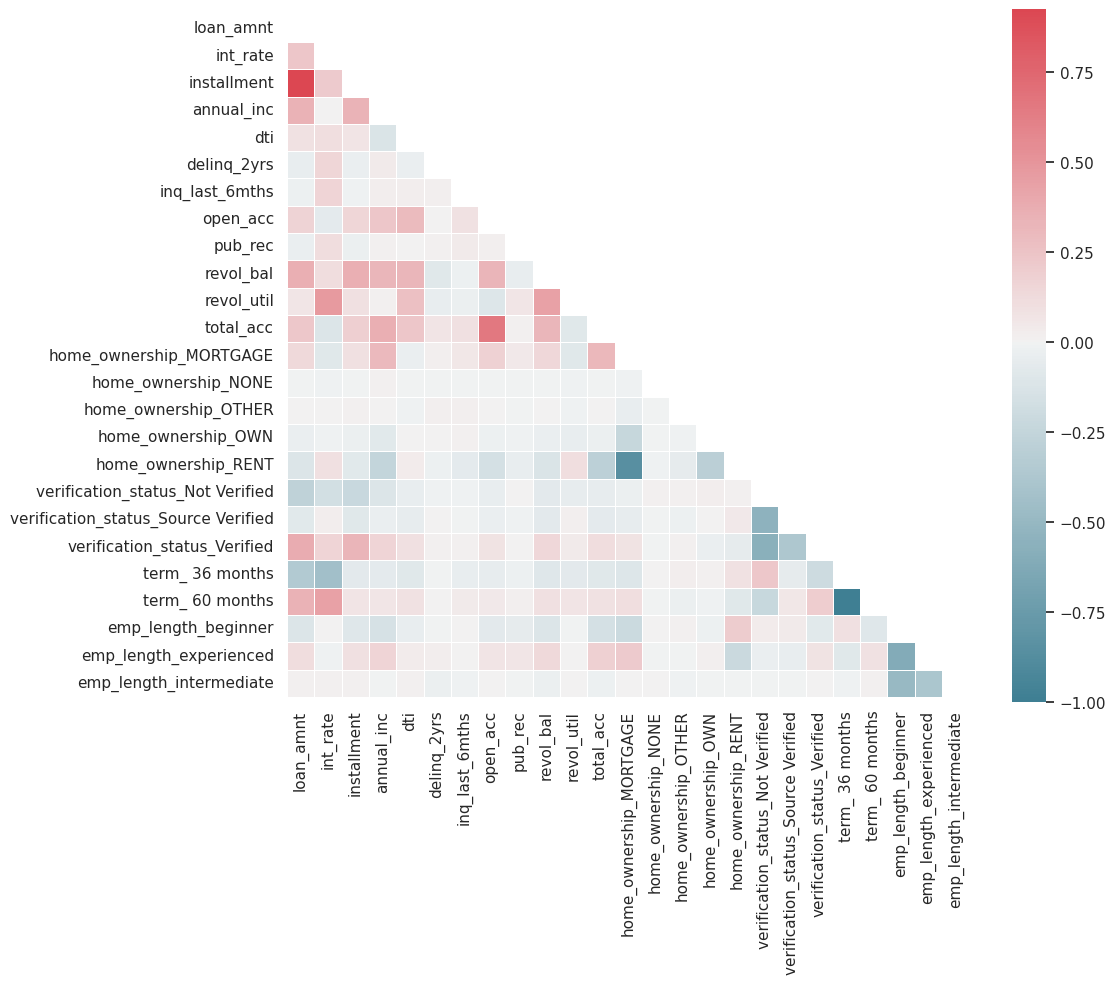

In [ ]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, fmt=".2f", linewidths=0.5)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
plot_correlation_heatmap(features)

In [ ]:
features.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_ 36 months', 'term_ 60 months', 'emp_length_beginner',
       'emp_length_experienced', 'emp_length_intermediate'],
      dtype='object')

In [ ]:
features_corr = features.drop(columns=['home_ownership_RENT','term_ 60 months','home_ownership_NONE'],axis=1)

In [ ]:
print(features_corr.shape)
# print(target.shape)

(32632, 22)


In [ ]:
scaled_data = normalize(df)
features_scaled = scaled_data[scaled_data[features_corr.columns].columns]
target_scaled = scaled_data['loan_status']

In [ ]:
start_time = time.time()
smote = SMOTE(sampling_strategy=0.5)
features_c, target_c = smote.fit_resample(features_scaled, target_scaled)
print(f'\nDuration: {time.time() - start_time:.3f} seconds')


Duration: 0.223 seconds


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features_c, target_c, test_size=0.33)

In [ ]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression(class_weight='balanced')
model4 = RandomForestClassifier(n_estimators=100)

In [ ]:
start_time = time.time()
model1.fit(X_train,Y_train)
print(f'\nDuration: {time.time() - start_time:.3f} seconds')


Duration: 0.356 seconds


In [ ]:
start_time = time.time()
model2.fit(X_train,Y_train)
print(f'\nDuration: {time.time() - start_time:.3f} seconds')


Duration: 0.008 seconds


In [ ]:
start_time = time.time()
model3.fit(X_train,Y_train)
print(f'\nDuration: {time.time() - start_time:.3f} seconds')


Duration: 0.167 seconds


In [ ]:
start_time = time.time()
model4.fit(X_train,Y_train)
print(f'\nDuration: {time.time() - start_time:.3f} seconds')


Duration: 4.410 seconds


In [ ]:
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)
pred4=model4.predict(X_test)

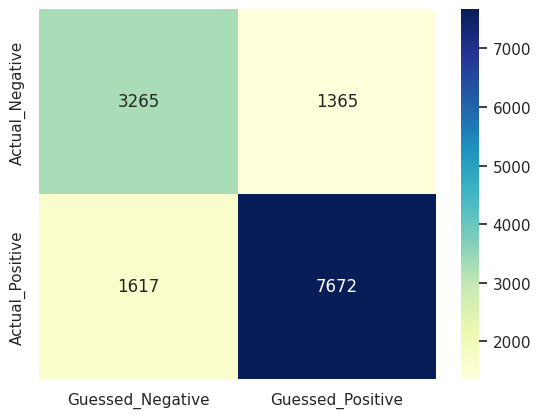

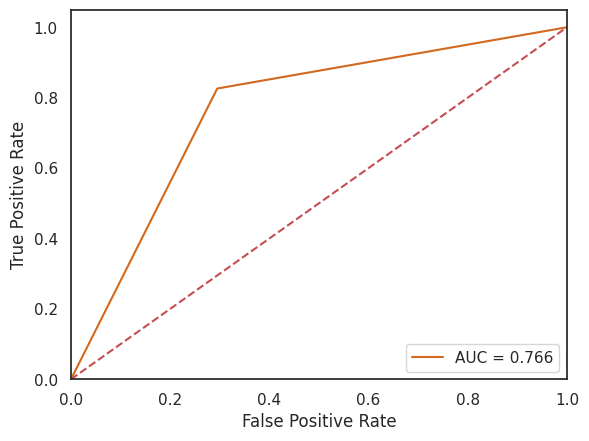

In [ ]:
plot_model_performance(pd.Series(Y_test), pd.Series(pred1))

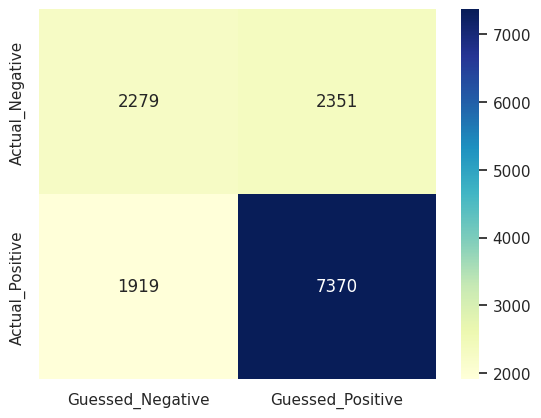

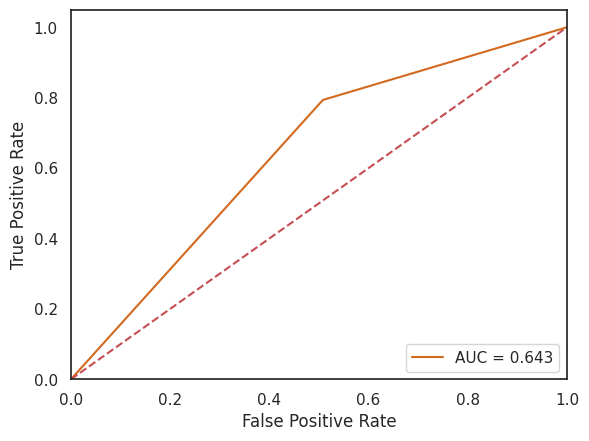

In [ ]:
plot_model_performance(pd.Series(Y_test), pd.Series(pred2))

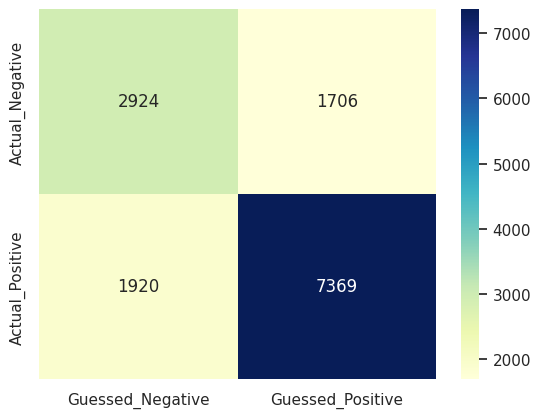

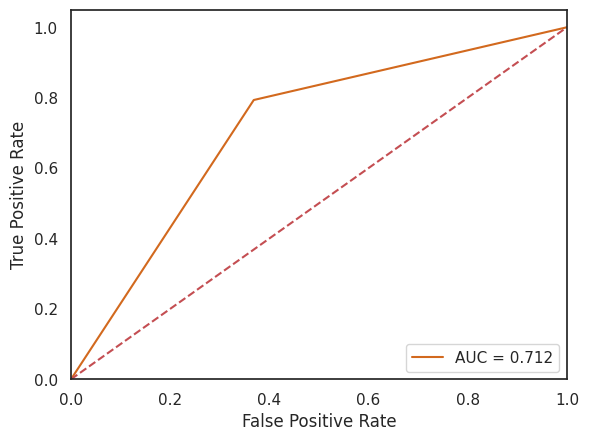

In [ ]:
plot_model_performance(pd.Series(Y_test), pd.Series(pred3))

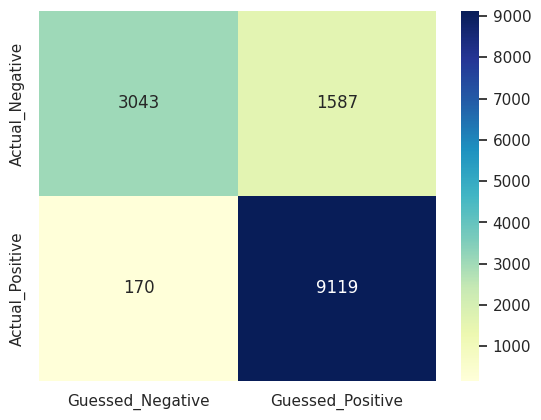

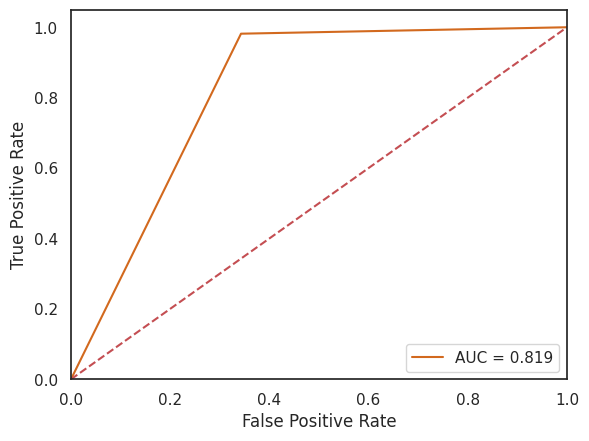

In [ ]:
plot_model_performance(pd.Series(Y_test), pd.Series(pred4))

In [ ]:
ml_models = {
    'Decision Tree': model1,
    'KNN': model2,
    'Logistic regression': model3,
    'Random Forest': model4
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(Y_test, ml_models[model].predict(X_test)):.3f}")

DECISION TREE                  roc_auc_score: 0.766
KNN                            roc_auc_score: 0.643
LOGISTIC REGRESSION            roc_auc_score: 0.712
RANDOM FOREST                  roc_auc_score: 0.819


In [ ]:
predictors = {
    'Decision Tree': pred1,
    'KNN': pred2,
    'Logistic regression': pred3,
    'Random Forest': pred4
}

In [ ]:
for predic in predictors:
    print(f"{predic.upper():{30}} Precision: {precision_score(Y_test, predictors[predic], average='macro')}")
    print(f"{predic.upper():{30}} Recall: {recall_score(Y_test, predictors[predic], average='macro')}")
    print(f"{predic.upper():{30}} Accuracy: {accuracy_score(Y_test, predictors[predic])}")

DECISION TREE                  Precision: 0.7588687922658712
DECISION TREE                  Recall: 0.765553360101953
DECISION TREE                  Accuracy: 0.7857604712982255
KNN                            Precision: 0.650515007097251
KNN                            Recall: 0.6428180920464461
KNN                            Accuracy: 0.693225088009196
LOGISTIC REGRESSION            Precision: 0.7078221900712705
LOGISTIC REGRESSION            Recall: 0.7124186925849032
LOGISTIC REGRESSION            Accuracy: 0.7394927796537107
RANDOM FOREST                  Precision: 0.8994276561528569
RANDOM FOREST                  Recall: 0.8194671023368405
RANDOM FOREST                  Accuracy: 0.873769667361161


In [ ]:
print(metrics.classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69      4630
         1.0       0.85      0.83      0.84      9289

    accuracy                           0.79     13919
   macro avg       0.76      0.77      0.76     13919
weighted avg       0.79      0.79      0.79     13919



In [ ]:
print(metrics.classification_report(Y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.54      0.49      0.52      4630
         1.0       0.76      0.79      0.78      9289

    accuracy                           0.69     13919
   macro avg       0.65      0.64      0.65     13919
weighted avg       0.69      0.69      0.69     13919



In [ ]:
print(metrics.classification_report(Y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.62      4630
         1.0       0.81      0.79      0.80      9289

    accuracy                           0.74     13919
   macro avg       0.71      0.71      0.71     13919
weighted avg       0.74      0.74      0.74     13919



In [ ]:
print(metrics.classification_report(Y_test,pred4))

              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78      4630
         1.0       0.85      0.98      0.91      9289

    accuracy                           0.87     13919
   macro avg       0.90      0.82      0.84     13919
weighted avg       0.88      0.87      0.87     13919



In [ ]:
##YET ANOTHER KNN MODEL
model5 = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
start_time = time.time()
model5.fit(X_train, Y_train)
print(f'\nDuration: {time.time() - start_time:.3f} seconds')


Duration: 0.009 seconds


In [ ]:
pred5 = model5.predict(X_test)

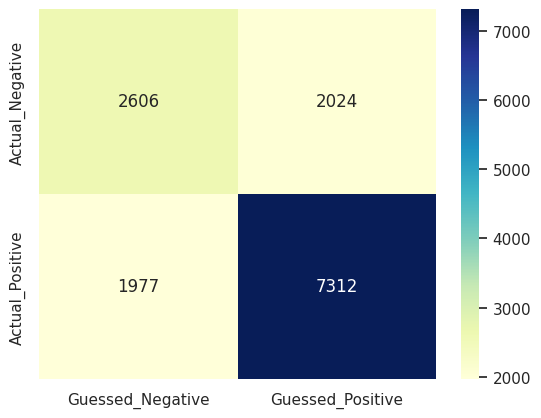

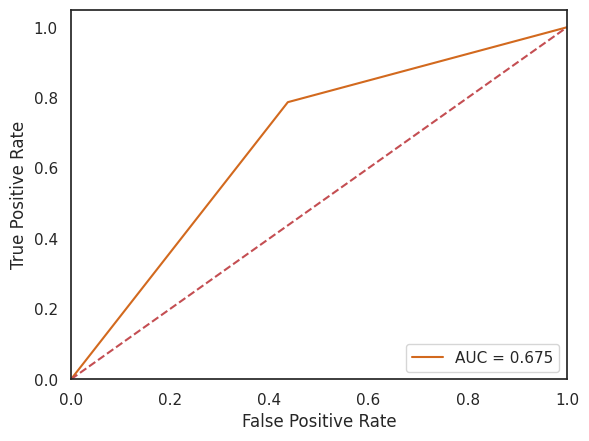

In [ ]:
plot_model_performance(pd.Series(Y_test), pd.Series(pred5))

In [ ]:
print(metrics.classification_report(Y_test,pred5))
print("Precision = {}".format(precision_score(Y_test, pred5, average='macro')))
print("Recall = {}".format(recall_score(Y_test, pred5, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, pred5)))

              precision    recall  f1-score   support

         0.0       0.57      0.56      0.57      4630
         1.0       0.78      0.79      0.79      9289

    accuracy                           0.71     13919
   macro avg       0.68      0.68      0.68     13919
weighted avg       0.71      0.71      0.71     13919

Precision = 0.6759139856116668
Recall = 0.6750092947672379
Accuracy = 0.7125511890221998
